In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [12]:
train = pd.read_csv("C:\\Users\\Rohacky\\Documents\\ds projects\\project 2\\loan_train.csv")
test = pd.read_csv("C:\\Users\\Rohacky\\Documents\\ds projects\\project 2\\loan_test.csv")

In [13]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [14]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [15]:
print(train.shape, test.shape)

(614, 12) (367, 11)


In [16]:
train.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

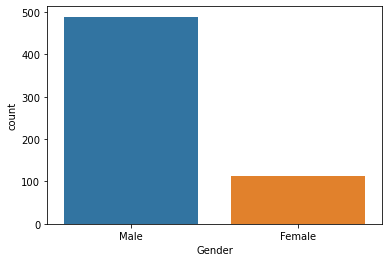

In [17]:
sns.countplot(x = "Gender", data = train)
plt.show()

In [18]:
count_male = len(train[train.Gender == 'Male'])
count_female = len(train[train.Gender == 'Female'])
count_null = len(train[train.Gender.isnull()])
print("Percentage of Male applicant: {:.2f}%".format((count_male / (len(train.Gender)) * 100)))
print("Percentage of Female applicant: {:.2f}%".format((count_female / (len(train.Gender)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Gender)) * 100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Percentage of Missing values: 2.12%


In [19]:
train.Married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

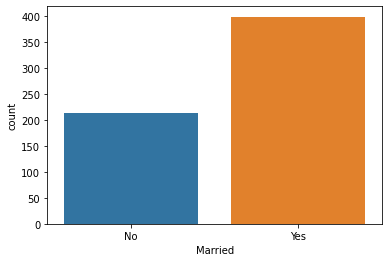

In [20]:
sns.countplot(x = "Married", data = train)
plt.show()

In [21]:
count_married = len(train[train.Married == 'Yes'])
count_nmarried = len(train[train.Married == 'No'])
count_null = len(train[train.Married.isnull()])
print("Percentage of Married applicant: {:.2f}%".format((count_married / (len(train.Married)) * 100)))
print("Percentage of Non-Married applicant: {:.2f}%".format((count_nmarried / (len(train.Married)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Married)) * 100)))

Percentage of Married applicant: 64.82%
Percentage of Non-Married applicant: 34.69%
Percentage of Missing values: 0.49%


In [22]:
train.Education.value_counts(dropna = False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

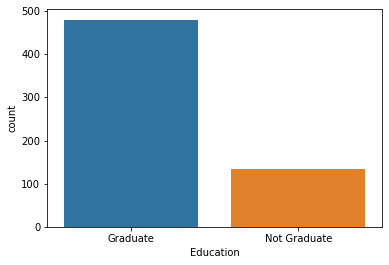

In [23]:
sns.countplot(x = "Education", data = train)
plt.show()

In [24]:
count_graduate = len(train[train.Education == 'Graduate'])
count_ngraduate = len(train[train.Education == 'Not Graduate'])
count_null = len(train[train.Education.isnull()])
print("Percentage of Graduate applicant: {:.2f}%".format((count_graduate / (len(train.Education)) * 100)))
print("Percentage of Non-Graduate applicant: {:.2f}%".format((count_ngraduate / (len(train.Education)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Education)) * 100)))

Percentage of Graduate applicant: 78.18%
Percentage of Non-Graduate applicant: 21.82%
Percentage of Missing values: 0.00%


In [25]:
train.Self_Employed.value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

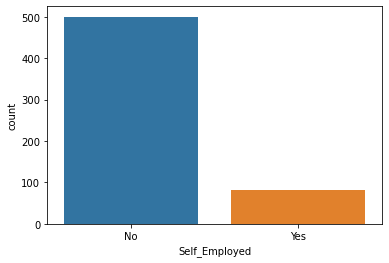

In [26]:
sns.countplot(x = "Self_Employed", data = train)
plt.show()

In [27]:
count_no = len(train[train.Self_Employed == 'No'])
count_yes = len(train[train.Self_Employed == 'Yes'])
count_null = len(train[train.Self_Employed.isnull()])
print("Percentage of Employed applicant: {:.2f}%".format((count_no / (len(train.Self_Employed)) * 100)))
print("Percentage of Self-Employed applicant: {:.2f}%".format((count_yes / (len(train.Self_Employed)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Self_Employed)) * 100)))

Percentage of Employed applicant: 81.43%
Percentage of Self-Employed applicant: 13.36%
Percentage of Missing values: 5.21%


In [28]:
train.Credit_History.value_counts(dropna = False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

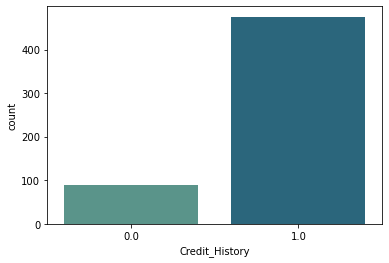

In [29]:
sns.countplot(x = "Credit_History", data = train, palette = 'crest')
plt.show()

In [30]:
count_1 = len(train[train.Credit_History == 1])
count_0 = len(train[train.Credit_History == 0])
count_null = len(train[train.Credit_History.isnull()])
print("Percentage of Good credit history: {:.2f}%".format((count_1 / (len(train.Credit_History)) * 100)))
print("Percentage of Bad credit history: {:.2f}%".format((count_0 / (len(train.Credit_History)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Credit_History)) * 100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Percentage of Missing values: 8.14%


In [31]:
train.Area.value_counts(dropna = False)

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

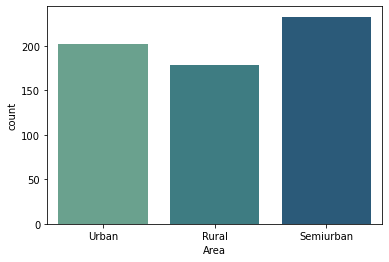

In [32]:
sns.countplot(x = "Area", data = train, palette = 'crest')
plt.show()

In [33]:
count_urban = len(train[train.Area == 'Urban'])
count_rural = len(train[train.Area == 'Rural'])
count_semi = len(train[train.Area == 'Semiurban'])
count_null = len(train[train.Area.isnull()])
print("Percentage of Urban applicants: {:.2f}%".format((count_urban / (len(train.Area)) * 100)))
print("Percentage of Rural applicants: {:.2f}%".format((count_rural / (len(train.Area)) * 100)))
print("Percentage of Semiurban applicants: {:.2f}%".format((count_semi / (len(train.Area)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Area)) * 100)))

Percentage of Urban applicants: 32.90%
Percentage of Rural applicants: 29.15%
Percentage of Semiurban applicants: 37.95%
Percentage of Missing values: 0.00%


In [34]:
train.Status.value_counts(dropna = False)

Y    422
N    192
Name: Status, dtype: int64

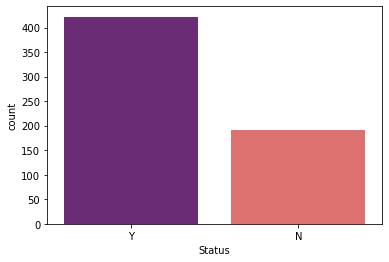

In [35]:
sns.countplot(x = "Status", data = train, palette = 'magma')
plt.show()

In [36]:
count_Y = len(train[train.Status == 'Y'])
count_N = len(train[train.Status == 'N'])
count_null = len(train[train.Status.isnull()])
print("Percentage of Approved applicants: {:.2f}%".format((count_Y / (len(train.Status)) * 100)))
print("Percentage of Rejected applicants: {:.2f}%".format((count_N / (len(train.Status)) * 100)))
print("Percentage of Missing values: {:.2f}%".format((count_null / (len(train.Status)) * 100)))

Percentage of Approved applicants: 68.73%
Percentage of Rejected applicants: 31.27%
Percentage of Missing values: 0.00%


In [37]:
train.Term.value_counts(dropna = False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Term, dtype: int64

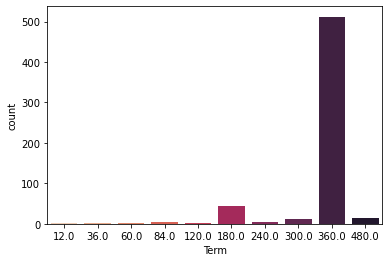

In [38]:
sns.countplot(x = "Term", data = train, palette = 'rocket_r')
plt.show()

In [39]:
train.Term.value_counts()/len(train) * 100

360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
84.0      0.651466
240.0     0.651466
120.0     0.488599
36.0      0.325733
60.0      0.325733
12.0      0.162866
Name: Term, dtype: float64

In [40]:
train[['Applicant_Income', 'Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


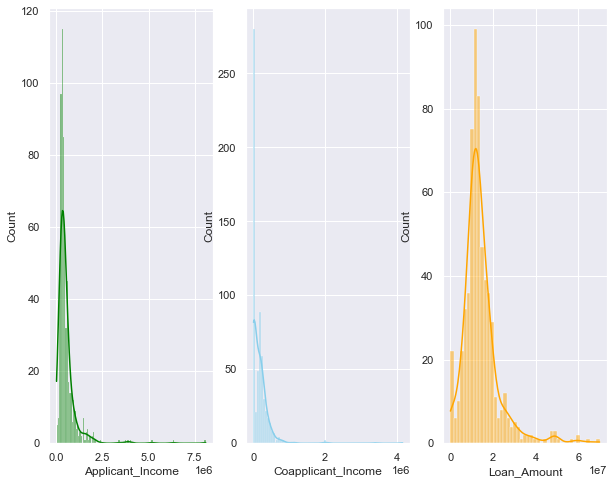

In [41]:
sns.set(style = 'darkgrid')
fig, axs = plt.subplots(1, 3, figsize = (10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color = 'orange')
plt.show()

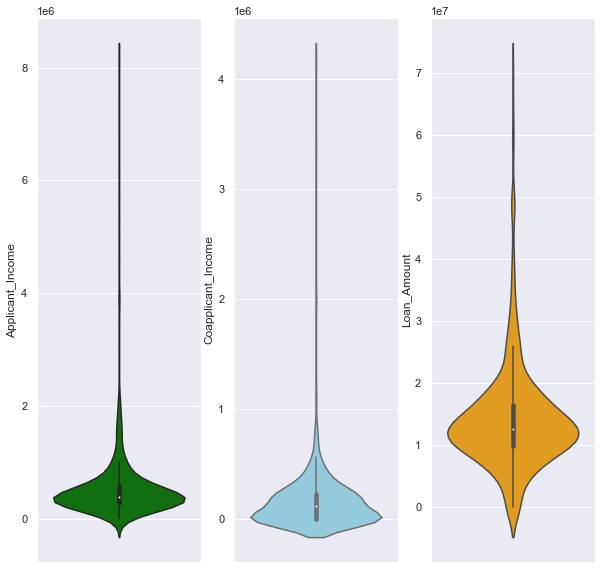

In [42]:
sns.set(style = 'darkgrid')
fig, axs1 = plt.subplots(1, 3, figsize = (10, 10))
plt.subplot(1,3,1)
sns.violinplot(data = train, y = "Applicant_Income", color = 'green')
plt.subplot(1,3,2)
sns.violinplot(data = train, y = "Coapplicant_Income", color = 'skyblue')
plt.subplot(1,3,3)
sns.violinplot(data = train, y = "Loan_Amount", color = 'orange')
plt.show()

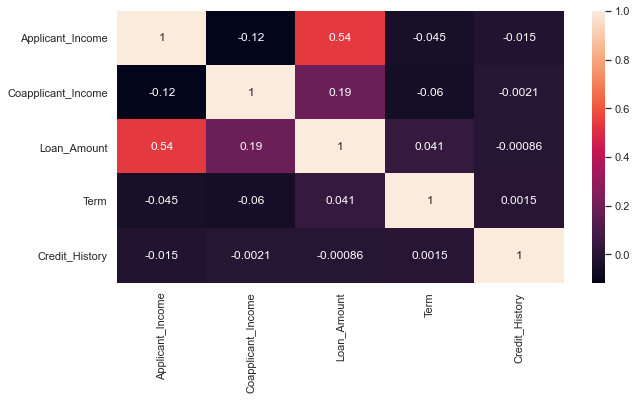

In [43]:
plt.figure(figsize = (10, 5))
sns.heatmap(train.corr(), annot = True)
plt.show()

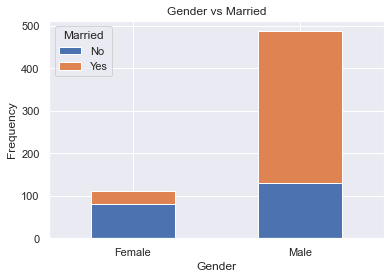

In [44]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

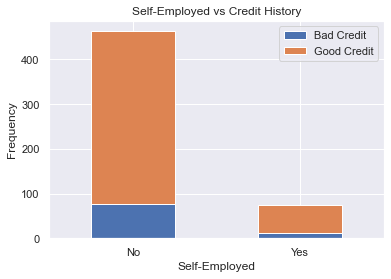

In [45]:
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind = 'bar', stacked = True)
plt.title('Self-Employed vs Credit History')
plt.xlabel('Self-Employed')
plt.ylabel('Frequency')
plt.legend(['Bad Credit', 'Good Credit'])
plt.xticks(rotation = 0)
plt.show()

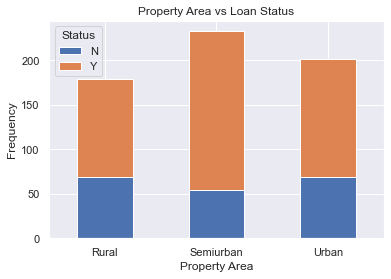

In [46]:
pd.crosstab(train.Area, train.Status).plot(kind = 'bar', stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

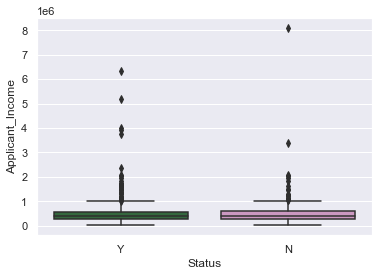

In [47]:
sns.boxplot(x = 'Status', y = 'Applicant_Income', data = train, palette = 'cubehelix')
plt.show()

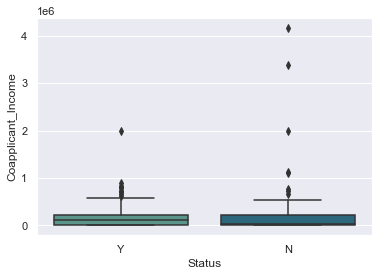

In [48]:
sns.boxplot(x = 'Status', y = 'Coapplicant_Income', data = train, palette = 'crest')
plt.show()

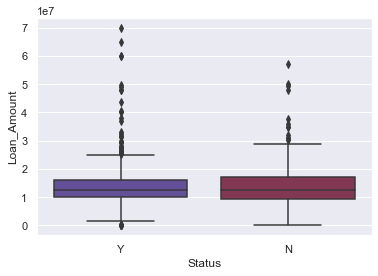

In [49]:
sns.boxplot(x = 'Status', y = 'Loan_Amount', data = train, palette = 'twilight')
plt.show()

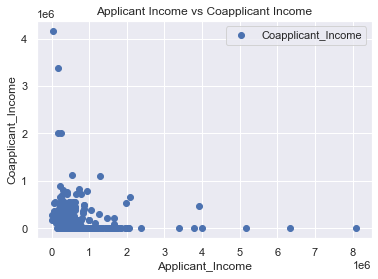

Pearson correlation: -0.11660458122889972
T Test and P value: 
 <module 'scipy.stats' from 'C:\\Users\\Rohacky\\anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'> Ttest_indResult(statistic=13.835753259915663, pvalue=1.4609839484240346e-40)


In [50]:
train.plot(x = 'Applicant_Income', y = 'Coapplicant_Income', style = 'o')
plt.title('Applicant Income vs Coapplicant Income')
plt.xlabel('Applicant_Income')
plt.ylabel('Coapplicant_Income')
plt.show()
print('Pearson correlation:', train['Applicant_Income'].corr(train['Coapplicant_Income']))
print('T Test and P value: \n', stats,ttest_ind(train['Applicant_Income'], train['Coapplicant_Income']))

In [51]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [52]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Term'].fillna(train['Term'].mode()[0], inplace = True)

In [53]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Term'].fillna(test['Term'].mode()[0], inplace = True)

In [54]:
train['Loan_Amount'].fillna(train['Loan_Amount'].mean(), inplace = True)
test['Loan_Amount'].fillna(test['Loan_Amount'].mean(), inplace = True)

In [55]:
train = pd.get_dummies(train)
# drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Status_N'], axis = 1)
# rename columns
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
train.rename(columns = new, inplace = True)

In [56]:
test = pd.get_dummies(test)
# drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No'], axis = 1)
# rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}  
test.rename(columns = new, inplace = True)

In [57]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1
train = train[~((train < (q1 - 1.5 * iqr)) | (train > (q3 + 1.5 * iqr))).any(axis = 1)]

In [58]:
q1 = test.quantile(0.25)
q3 = test.quantile(0.75)
iqr = q3 - q1
test = test[~((test < (q1 - 1.5 * iqr)) | (test > (q3 + 1.5 * iqr))).any(axis = 1)]

In [59]:
train.Applicant_Income = np.sqrt(train.Applicant_Income)
train.Coapplicant_Income = np.sqrt(train.Coapplicant_Income)
train.Loan_Amount = np.sqrt(train.Loan_Amount)

In [60]:
test.Applicant_Income = np.sqrt(test.Applicant_Income)
test.Coapplicant_Income = np.sqrt(test.Coapplicant_Income)
test.Loan_Amount = np.sqrt(test.Loan_Amount)

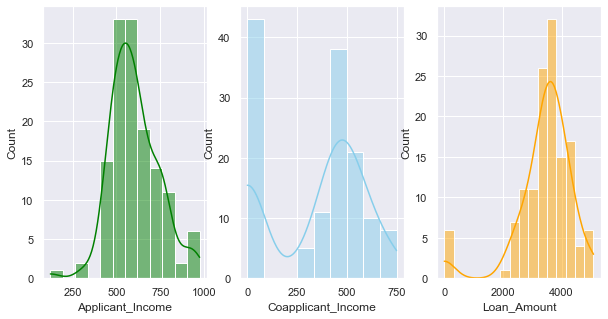

In [61]:
sns.set(style = 'darkgrid')
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
plt.subplot(1,3,1)
sns.histplot(data = train, x = 'Applicant_Income', kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = 'Coapplicant_Income', kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = 'Loan_Amount', kde = True, color = 'orange')
plt.show()

In [62]:
train.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban', 'Status_Y'],
      dtype='object')

In [63]:
test.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [64]:
x = train.drop(['Status_Y'], axis = 1)
y = train['Status_Y']

In [65]:
x, y = SMOTE().fit_resample(x, y)

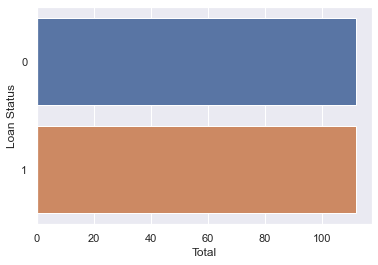

In [66]:
sns.set_theme(style = 'darkgrid')
sns.countplot(y = y, data = train)
plt.xlabel('Total')
plt.ylabel('Loan Status')
plt.show()

In [67]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)
test = minmax.transform(test)

In [70]:
# logistic regression
lr = LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
lracc = accuracy_score(y_pred, y_test)
print('LR accuracy: {:.2f}%'.format(lracc * 100))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.50      0.75      0.60        20

    accuracy                           0.56        45
   macro avg       0.58      0.57      0.55        45
weighted avg       0.59      0.56      0.54        45

[[10 15]
 [ 5 15]]
LR accuracy: 55.56%


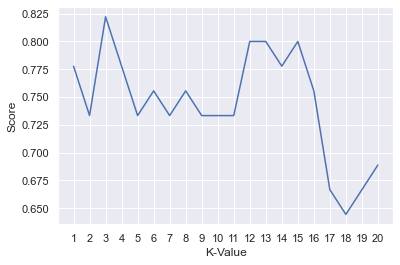

KNN best accuracy: 82.22%


In [73]:
# k-nearest neighbor
score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel('K-Value')
plt.ylabel('Score')
plt.show()
knacc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(knacc * 100))

In [74]:
# support vector machine
svc = SVC(kernel = 'rbf', max_iter = 500)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
svcacc = accuracy_score(y_pred, y_test)
print("SVC accuracy: {:.2f}%".format(svcacc * 100))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.53      0.80      0.64        20

    accuracy                           0.60        45
   macro avg       0.63      0.62      0.59        45
weighted avg       0.64      0.60      0.59        45

[[11 14]
 [ 4 16]]
SVC accuracy: 60.00%


In [75]:
# categorical naive bayes
nbc0 = CategoricalNB()
nbc0.fit(x_train, y_train)
y_pred = nbc0.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
nbacc0 = accuracy_score(y_pred, y_test)
print("Categorical Naive Bayes accuracy: {:.2f}%".format(nbacc0 * 100))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.83      0.50      0.62        20

    accuracy                           0.73        45
   macro avg       0.77      0.71      0.71        45
weighted avg       0.76      0.73      0.72        45

[[23  2]
 [10 10]]
Categorical Naive Bayes accuracy: 73.33%


In [76]:
# gaussian naive bayes
nbc1 = GaussianNB()
nbc1.fit(x_train, y_train)
y_pred = nbc1.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
nbacc1 = accuracy_score(y_pred, y_test)
print("Gaussian Naive Bayes accuracy: {:.2f}%".format(nbacc1 * 100))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        25
           1       0.77      0.50      0.61        20

    accuracy                           0.71        45
   macro avg       0.73      0.69      0.69        45
weighted avg       0.72      0.71      0.70        45

[[22  3]
 [10 10]]
Gaussian Naive Bayes accuracy: 71.11%


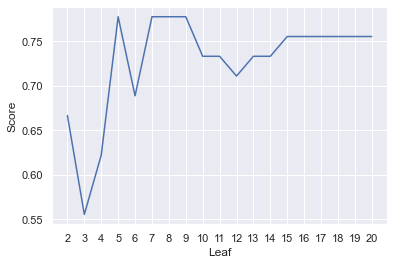

Decision Tree accuracy: 77.78%


In [81]:
# decision tree
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes = i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel('Leaf')
plt.ylabel('Score')
plt.show()
dtacc = max(score_dt)
print("Decision Tree accuracy: {:.2f}%".format(dtacc * 100))

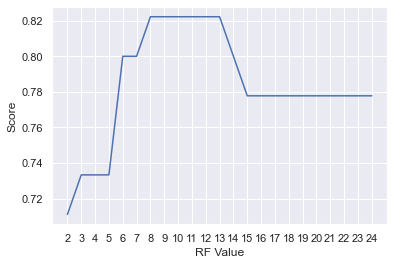

Random Forest accuracy: 82.22%


In [79]:
score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes =i)
    rfc.fit(x_train, y_train)
    score_rf.append(rfc.score(x_test, y_test))
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel('RF Value')
plt.ylabel('Score')
plt.show()
rfacc = max(score_rf)
print("Random Forest accuracy: {:.2f}%".format(rfacc * 100))

In [85]:
# gradient boosting
paramsGB = {'n_estimators' : [100, 200, 300, 400, 500],
           'max_depth' : [1,2,3,4,5],
           'subsample' : [0.5,1],
           'max_leaf_nodes' : [2, 5, 10, 20, 30, 40, 50]}

In [86]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv = 20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [87]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=40, n_estimators=400, subsample=0.5)
0.8152777777777775
{'subsample': 0.5, 'n_estimators': 400, 'max_leaf_nodes': 40, 'max_depth': 3}
9


In [88]:
gbc = GradientBoostingClassifier(subsample = 0.5, n_estimators = 400, max_depth = 4, max_leaf_nodes = 10)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
gbacc = accuracy_score(y_pred, y_test)
print("Gradient Boosting accuracy: {:.2f}%".format(gbacc * 100))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.70      0.80      0.74        20

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

[[18  7]
 [ 4 16]]
Gradient Boosting accuracy: 75.56%


In [89]:
# model comparison
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K-Neighbors', 'Support Vector Machine', 
                                     'Categorial Naive Bayes', 'Gaussian Naive Bayes', 'Decision Tree',
                                     'Random Forest', 'Gradient Boost'],
                           'Accuracy': [lracc*100, knacc*100, svcacc*100, nbacc0*100, nbacc1*100, 
                                        dtacc*100, rfacc*100, gbacc*100]})
comparison.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
1,K-Neighbors,82.222222
6,Random Forest,82.222222
5,Decision Tree,77.777778
7,Gradient Boost,75.555556
3,Categorial Naive Bayes,73.333333
4,Gaussian Naive Bayes,71.111111
2,Support Vector Machine,60.000000
0,Logistic Regression,55.555556


In [90]:
y_pred = rfc.predict(test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=uint8)